In [1]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#!pip install unidecode
#!pip install datasketch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import unidecode
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict
from collections import Counter
import random
from datasketch import MinHash, MinHashLSH

In [2]:
def measure_metrics(true_labels, predicted_labels):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(true_labels)):
        golden = str(true_labels[i]).split(", ")
        predicted = str(predicted_labels[i]).split(", ")
        if len(golden) == 1 and len(predicted) == 1 and predicted == golden:
            tn += 1
        elif golden == predicted:
            tp += 1
        elif len(predicted) > len(golden):
            fp += 1
        else:
            fn += 1
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1score = 2*tp / (2*tp + fp + fn)
    return accuracy, precision, recall, f1score



def measure_metrics2(true_labels, predicted_labels):
    pre = []
    rec = []
    f1 = []

    for i in range(len(true_labels)):
        tp = 0
        fp = 0
        fn = 0
        
        golden = str(true_labels[i]).split(", ")
        predicted = str(predicted_labels[i]).split(", ")
        
        # Check if there is an intersection before attempting to remove elements
        intersection = list(set(golden).intersection(set(predicted)))
        if intersection:
            to_remove = intersection[0]
            golden.remove(to_remove)
            predicted.remove(to_remove)
        
        if golden or predicted:
            for j in golden:
                if j in predicted:
                    tp += 1
                else:
                    fn += 1

            for j in predicted:
                if j not in golden:
                    fp += 1

            if tp + fp == 0:
                precision = 0
            else:
                precision = tp / (tp + fp)

            if tp + fn == 0:
                recall = 0
            else:
                recall = tp / (tp + fn)

            if precision + recall == 0:
                f1score = 0
            else:
                f1score = 2 * (precision * recall) / (precision + recall)
                
            pre.append(precision)
            rec.append(recall)
            f1.append(f1score)

    return np.mean(pre), np.mean(rec), np.mean(f1)


def replace_non_letters(input_string):
    return re.sub(r"[^a-zA-Z\s]", " ", input_string)

def unidecoded(panda_column):
    return panda_column.astype(str).apply(
        lambda x: unidecode.unidecode(
            x.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')
             .replace('Ä', 'Ae').replace('Ö', 'Oe').replace('Ü', 'Ue')))


In [3]:
def generate_emails(first_name, last_name):
    # Diese Funktion erzeugt eine Liste von E-Mail-Adressen basierend auf Vor- und Nachnamen
    # Diese Liste enthält verschiedene Formate wie Vorname.Nachname, VNach, Vorname usw.
    emails = []
    emails.append(f"{first_name.lower()}.{last_name.lower()}")
    emails.append(f"{first_name.lower()[0]}{last_name.lower()}")
    emails.append(f"{first_name.lower()}")
    emails.append(f"{first_name.lower()[0]}.{last_name.lower()}")
    emails.append("anderes")
    emails.append("info")
    emails.append(f"{last_name.lower()}")
    emails.append(f"{first_name.lower()}{last_name.lower()}")
    emails.append(f"{first_name.lower()}.{last_name.lower()}1990")  # Vor.NachnameJahr
    return emails

def fake_emails(first_name, last_name):
    # Diese Funktion generiert eine E-Mail-Adresse basierend auf den gegebenen Wahrscheinlichkeiten
    distr = {
        "vor.nach": 55/100,
        "vnach": 10/100,
        "vor": 9/100,
        "v.nach": 6/100,
        "anderes": 6/100,
        "info": 5/100,
        "nach": 4/100,
        "vornach": 3/100,
        "vor.nachjahr": 2/100
    }
    
    # Generiere eine Liste von E-Mail-Adressen
    emails = generate_emails(first_name, last_name)
    
    # Wähle zufällig eine E-Mail-Adresse basierend auf den Wahrscheinlichkeiten aus
    random_percentage = random.random()
    total = 0
    i = 0
    for scenario, percentage in distr.items():
        total += percentage
        if random_percentage <= total:

            return emails[i]  # Gib die E-Mail-Adresse zurück
        else:
            i += 1

def plausible_email(first_name, last_name, email):
    email = email.split("@")[0]
    email = re.sub(r'\d+', '', email)
    plausible_formats = [
        f"{first_name.lower()}.{last_name.lower()}",
        f"{first_name.lower()}{last_name.lower()}",
        f"{first_name.lower()[0]}{last_name.lower()}",
        f"{first_name.lower()}",
        f"{first_name.lower()[0]}.{last_name.lower()}",
        f"{last_name.lower()}",
    ]
    
    if first_name and last_name in email:
        return True
    else:
        return email in plausible_formats

# Beispielvor- und nachname
first_name = "Max"
last_name = "Mustermann"

df = pd.read_excel("Testcases.xlsx")

for vor, nach, email in zip(unidecoded(df["Vorname"]).to_list(), unidecoded(df["Nachname"]).to_list(), unidecoded(df["Email"]).to_list()):
    res = plausible_email(vor, nach, email)
    print(res)
    # Generiere eine E-Mail-Adresse basierend auf den Wahrscheinlichkeiten
    #generated_email = fake_emails(unidecode(str(vor)), unidecode(str(nach)))

    # Ausgabe der generierten E-Mail-Adresse
    #print(generated_email)


True
True
True
True
True
False
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
False
True
True
True
False
False
True
False
False
False
False
True
False
False
True
True
False
False
True
True
True
True
False
False
False
True
True
False
False
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
T

In [4]:

df = pd.read_excel("Alle_Dubletten_geprüft.xlsx")

vorname_count = unidecoded(df["Vorname"]).str.lower().value_counts()
nachname_count = unidecoded(df["Nachname"]).str.lower().value_counts()

top_20_vornamen = vorname_count.head(21)
top_20_nachnamen = nachname_count.head(21)

two_to_five_occ = vorname_count[(vorname_count >= 2) & (vorname_count <= 5)]

print(top_20_vornamen, top_20_nachnamen)

def count_dup_top_20(name_col: List[str], dup_col: List[str]) -> Dict:
    name_col = [unidecode(str(string)) for string in name_col]
    name_dict = {}
    
    for i, name in enumerate(name_col):
        if name != "nan" and len(dup_col[i].split(", ")) > 1 and (name.lower() in top_20_vornamen or name.lower() in top_20_nachnamen):
            if name.capitalize() not in name_dict:
                name_dict[name.capitalize()] = 1
            else:
                name_dict[name.capitalize()] += 1
    sorted_dict = dict(sorted(name_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict



def count_dup_rare(name_col: List[str], dup_col: List[str]) -> Dict:
    name_col = [unidecode(str(string)) for string in name_col]
    name_dict = {}
    
    for i, name in enumerate(name_col):
        if name != "nan" and len(dup_col[i].split(", ")) > 1 and name.lower() in two_to_five_occ:
            if name.capitalize() not in name_dict:
                name_dict[name.capitalize()] = 1
            else:
                name_dict[name.capitalize()] += 1
    sorted_dict = dict(sorted(name_dict.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict


def factor_count_dup_rare(name_col: List[str], dup_col: List[str]) -> int:
    dup_dict = count_dup_rare(name_col, dup_col)
    count_dict = two_to_five_occ.to_dict()
    
    if "nan" in count_dict:
        del count_dict["nan"]
    print(count_dict)
    return sum(dup_dict.values()) / sum(count_dict.values())
    

nan          3587
thomas        505
daniel        444
andreas       380
martin        351
markus        347
peter         340
stefan        317
christian     313
michael       306
patrick       219
urs           213
marco         204
christoph     200
marcel        175
roland        171
marc          166
matthias      158
beat          158
reto          152
adrian        149
Name: Vorname, dtype: int64 nan           3477
mueller        171
meier          114
schmid          78
meyer           75
keller          75
zentrale        65
schneider       65
fischer         59
huber           58
widmer          54
weber           54
zimmermann      48
steiner         44
roth            43
brunner         43
frei            42
berger          40
baumann         40
gerber          39
graf            39
Name: Nachname, dtype: int64


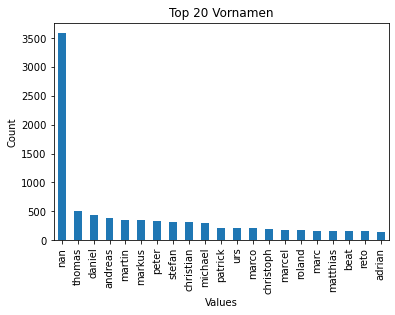

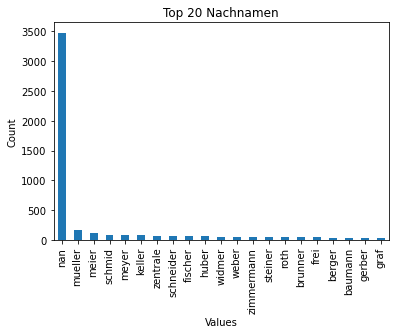

In [5]:
top_20_vornamen.plot(kind="bar")
plt.title("Top 20 Vornamen")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

top_20_nachnamen.plot(kind="bar")
plt.title("Top 20 Nachnamen")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

In [6]:
df = pd.read_excel("Testcases.xlsx")

#replace Umlaute
df["Vorname"] = df['Vorname'].str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue').str.replace('Ä', 'Ae').str.replace('Ö', 'Oe').str.replace('Ü', 'Ue')
df["Nachname"] = df['Nachname'].str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue').str.replace('Ä', 'Ae').str.replace('Ö', 'Oe').str.replace('Ü', 'Ue')

def simple(full_name):
    namen = {}

    for index, name in full_name.items():
        if name == "":
            continue

        if name in namen:
            namen[name].append(int(df.at[index, "ID"]))
        else:
            namen[name] = [int(df.at[index, "ID"])]

    df["Simple Match"] = str(0)
    for n in namen:
        for m in namen[n]:
            df.at[m-1, "Simple Match"] = str(namen[n])[1:-1]


    sorted_dict = dict(sorted(namen.items(), key=lambda item: item[1], reverse=True))

In [7]:
import unidecode
import pandas as pd

def soundex(full_name):
    soundex_mapping = {
        "a": "0", "e": "0", "i": "0", "o": "0", "u": "0", "ä": "0", "ö": "0", "ü": "0", "y": "0", "j": "0", "h": "0",
        "b": "1", "p": "1", "f": "1", "v": "1", "w": "1",
        "c": "2", "s": "2", "k": "2", "g": "2", "q": "2", "x": "2", "z": "2", "ß": "2",
        "d": "3", "t": "3",
        "l": "4",
        "m": "5", "n": "5",
        "r": "6",
        "ch": "7", "sch": "7", "sh": "7",
        "-": " "
    }

    soundex_codes = {}

    for index, name in full_name.items():
        if name == "":
            continue

        name = name.lower()
        name = name.replace("sch", "7").replace("ch", "7").replace("sh", "7")

        soundex_code = name[0].upper()

        previous_digit = ""
        for letter in name[1:]:
            if letter in soundex_mapping:
                current_digit = soundex_mapping[letter]
                if current_digit != previous_digit and current_digit != "0":
                    soundex_code += current_digit
                    previous_digit = current_digit

        soundex_code = soundex_code[:4]

        while len(soundex_code) < 4:
            soundex_code += '0' 
        if soundex_code in soundex_codes:
            soundex_codes[soundex_code].append(index+1)
        else:
            soundex_codes[soundex_code] = [index+1]
            
    df["Soundex"] = str(0)
    
    for n in soundex_codes:
        for m in soundex_codes[n]:
            df.at[m-1, "Soundex"] = str(soundex_codes[n])[1:-1]



In [8]:
#Soundex representation
df = pd.read_excel("Testcases.xlsx")

def soundex_custom(full_name):
    soundex_mapping = {
            "a": "0", "e": "0", "i": "0", "o": "0", "u": "0", "ä": "0", "ö": "0", "ü": "0", "y": "0", "j": "0", "h": "0",
            "b": "1", "p": "1", "f": "1", "v": "1", "w": "1",
            "c": "2", "s": "2", "k": "2", "g": "2", "q": "2", "x": "2", "z": "2", "ß": "2",
            "d": "3", "t": "3",
            "l": "4",
            "m": "5", "n": "5",
            "r": "6",
            "ch": "7", "sch": "7",
            "-": " "
        }

    soundex_namen = {}

    for index, name in full_name.items():

        if name == "" or pd.isna(name):
            continue

        name = str(name).replace("sch", "7").replace("ch", "7").replace("sh", "7")

        soundex_name = ""
        soundex_name += name[0]

        for letter in name.lower()[1:]:
            if letter in soundex_mapping and soundex_mapping[letter] != soundex_name[-1]:
                soundex_name += soundex_mapping[letter]

            elif letter not in soundex_mapping:
                soundex_name += letter
                
        if soundex_name in soundex_namen:
            soundex_namen[soundex_name].append(int(df.at[index, "ID"]))
        else:
            soundex_namen[soundex_name] = [int(df.at[index, "ID"])]

    df["Soundex Custom"] = str(0)
    for n in soundex_namen:
        for m in soundex_namen[n]:
            df.at[m-1, "Soundex Custom"] = str(soundex_namen[n])[1:-1]
        

In [9]:
def levenshteinDistance(A, B):
    N, M = len(A), len(B)
    
    dp = [[0 for i in range(M + 1)] for j in range(N + 1)]

    for j in range(M + 1):
        dp[0][j] = j
        
    for i in range(N + 1):
        dp[i][0] = i
        
    for i in range(1, N + 1):
        for j in range(1, M + 1):
            if A[i - 1] == B[j - 1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j],
                    dp[i][j-1],
                    dp[i-1][j-1]
                )

    return dp[N][M]

In [10]:
#replace Umlaute

df["Vorname"] = df['Vorname'].str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue').str.replace('Ä', 'Ae').str.replace('Ö', 'Oe').str.replace('Ü', 'Ue')
df["Nachname"] = df['Nachname'].str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue').str.replace('Ä', 'Ae').str.replace('Ö', 'Oe').str.replace('Ü', 'Ue')


def levenshtein(full_name, max_distance=3):
    namen = {}
    max_distance = 3

    for index, name in full_name.items():
        if pd.isna(name):
            continue
        if name not in namen:
            namen[name] = [int(df.at[index, "ID"])]
        elif pd.notna(df.at[index, "ID"]):
            namen[name].append(int(df.at[index, "ID"]))

    for name in namen:
        for n in namen:
            if any(namen[n]) not in namen[name]:
                if levenshteinDistance(name, n) in range(1, max_distance):
                    namen[name] += namen[n]
                    namen[name] = list(set(namen[name]))


    df["Levenshtein"] = str(0)
    for n in namen:
        for m in namen[n]:
            df.at[m-1, "Levenshtein"] = str(namen[n])[1:-1]


In [11]:
def koln(df, column_name):
    koln_mapping = {
        "a": "", "e": "", "i": "", "o": "", "u": "", "ä": "", "ö": "", "ü": "", "y": "", "j": "", "h": "",
        "b": "1",
        "f": "3", "v": "3", "w": "3",
        "g": "4", "k": "4", "q": "4",
        "l": "5",
        "m": "6", "n": "6",
        "r": "7",
        "s": "8", "z": "8",
        "-": ""
    }

    def koln_encode(name):
        if name != "":

            koln_name = [str(name)[0]]

            for n, letter in enumerate(str(name)[1:], start=1):
                if letter == "p":
                    if n < len(name) and name[n] == "h":
                        koln_name.append("3")
                    else:
                        koln_name.append("1")

                elif letter in "dt":
                    if n < len(name) and name[n] in "csz":
                        koln_name.append("8")
                    else:
                        koln_name.append("2")

                elif letter == "c":
                    if n == 1 and n < len(name) and name[n] in "ahkloqrux":
                        koln_name.append("4")
                    elif n < len(name) and name[n] in "ahkloqrux" and name[n - 1] not in "sz":
                        koln_name.append("4")
                    else:
                        koln_name.append("8")

                elif letter == "x":
                    if name[n - 1] in "ckq":
                        koln_name.append("8")
                    else:
                        koln_name.append("48")

                elif letter in koln_mapping and (not koln_name or koln_mapping[letter] != koln_name[-1]):
                    koln_name.append(koln_mapping[letter])

            koln_name = ''.join(koln_name[i] for i in range(len(koln_name)) if i == 0 or koln_name[i] != koln_name[i-1])
            return koln_name
        

    df["Koln"] = df[column_name].apply(koln_encode)

    koln_namen = df.groupby("Koln")["ID"].apply(list).to_dict()

    df["Koln"] = df["Koln"].map(lambda k: ", ".join(map(str, koln_namen.get(k, []))) or "0")


In [12]:
def ngrams(text, n=2):
    text = f"{'#' * (n-1)}{text.lower().replace(' ', '_')}{'#' * (n-1)}"
    return [text[i:i+n] for i in range(len(text) - n + 1)]

def cosine_similarity(ngrams1, ngrams2):
    freq_vector1 = Counter(ngrams1)
    freq_vector2 = Counter(ngrams2)

    unique_ngrams = set(freq_vector1.keys()) | set(freq_vector2.keys())

    dot_product = sum(freq_vector1[ngram] * freq_vector2[ngram] for ngram in unique_ngrams)

    magnitude1 = np.sqrt(sum(freq_vector1[ngram] ** 2 for ngram in unique_ngrams))
    magnitude2 = np.sqrt(sum(freq_vector2[ngram] ** 2 for ngram in unique_ngrams))

    similarity = dot_product / (magnitude1 * magnitude2)

    return similarity


def ngram_similarity(full_name, ngram=3, border=0.65):
    df["Ngram Similarity"] = str(0)
    similarities = {}
    names = full_name.to_list()

    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            ngrams1 = ngrams(names[i], ngram)
            ngrams2 = ngrams(names[j], ngram)
            if cosine_similarity(ngrams1, ngrams2) > border:
                if i not in similarities:
                    similarities[i] = [i+1, j+1]
                else:
                    similarities[i].append(j+1)
                
                print(cosine_similarity(ngrams1, ngrams2), names[i], names[j])

        if i not in similarities:
            similarities[i] = [i+1]

    for i in similarities:
        for j in similarities[i]:
            if df.at[j-1, "Ngram Similarity"] == str(0):
                df.at[j-1, "Ngram Similarity"] = str(similarities[i])[1:-1]

In [13]:
def minhash_for_ngrams(ngrams, num_perm=128):
    mhash = MinHash(num_perm=num_perm)
    for ngram in ngrams:
        mhash.update(ngram.encode('utf-8'))
    return mhash

def lsh_similarity_check(full_name, ngram_size=2, threshold=0.65, num_perm=128):
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    minhashes = {}
    similarities = []

    for index, name in full_name.items():
        if name == "":
            continue
        name_ngrams = ngrams(str(name), ngram_size)
        mhash = minhash_for_ngrams(name_ngrams, num_perm)
        lsh.insert(f"name{index}", mhash)
        minhashes[f"name{index}"] = mhash

    df["LSH Similarity"] = pd.Series([set() for _ in range(len(df))])

    for key, minhash in minhashes.items():
        potential_matches = lsh.query(minhash)
        index_key = int(key.replace("name", ""))
        for match in potential_matches:
            if key != match:
                index_match = int(match.replace("name", ""))
                actual_similarity = minhash.jaccard(minhashes[match])
                if actual_similarity >= threshold:
                    similarities.append(actual_similarity)
                    df.at[index_key, "LSH Similarity"].add(index_match+1)
                    df.at[index_match, "LSH Similarity"].add(index_key+1)
            elif key == match:
                df.at[index_key, "LSH Similarity"].add(index_key+1)
                
                
    df["LSH Similarity"] = df["LSH Similarity"].apply(lambda x: str(sorted(list(x)))[1:-1] or "0")


def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    if len(union) == 0:
        return 1.0
    jaccard_index = len(intersection) / len(union)
    
    return jaccard_index

print(jaccard_similarity("Henri Waternoose", "Henry Peter Waternose"))
print(cosine_similarity(ngrams("johann johann", 3), ngrams("johann seeler", 3)))


print(jaccard_similarity(ngrams("robert frei", 2), ngrams("robert frei robert", 2)))
print(jaccard_similarity(ngrams("Henri Waternoose", 2), ngrams("Henry Peter Waternose", 2)))
print(cosine_similarity(ngrams("Henri Waternoose", 3), ngrams("Henry Peter Waternose", 3)))

print(jaccard_similarity(ngrams("mario mueller", 3), ngrams("maria mueller", 3)))
print(jaccard_similarity(ngrams("juergen kaiser", 3), ngrams("juergen geiser", 3)))

0.7692307692307693
0.5922200922639821
0.7333333333333333
0.6086956521739131
0.6599663291074445
0.6666666666666666
0.6


In [14]:
df = pd.read_excel("Testcases.xlsx")
df = pd.read_excel("Alle_Dubletten_geprüft.xlsx")
import time

vornamen = unidecoded(df["Vorname"]).to_list()
nachnamen = unidecoded(df["Nachname"]).to_list()
emails = unidecoded(df["Email"]).to_list()


df["Standardized"] = str(0)
index = 0
for vor, nach, email in zip(vornamen, nachnamen, emails):
    full_name = replace_non_letters(f"{vor} {nach}".lower())
    email_prefix = email.split("@")[0].lower()
    email_prefix = replace_non_letters(re.sub(r'\d+', '', email_prefix))
    
    if vor == "nan" or nach == "nan":
        if email != "nan":
            to_check = email.split(".")[0]
                                                               
        else:
            to_check = ""
    
    #uncomment if there is a column "Anrede":
    elif df.at[index, "Anrede"] == "Zentrale":
        to_check = ""
            
    elif plausible_email(vor, nach, email):
        to_check = full_name
    
    elif cosine_similarity(ngrams(full_name, 2), ngrams(email_prefix, 2)) > 0.65:
        to_check = email_prefix
        print(to_check, "|", full_name)
    
    else:
        to_check = full_name
    df.at[index, "Standardized"] = to_check
    index += 1
    
simple(df["Standardized"])
soundex(df["Standardized"])
soundex_custom(df["Standardized"])
koln(df, "Standardized")
#levenshtein(df["Standardized"])
#ngram_similarity(df["Standardized"], 3)
start = time.time()
lsh_similarity_check(df["Standardized"], 2)
end = time.time()

print(end - start)
df.to_excel("output2.xlsx")

marko dobec | marko marko dobec
elion metaj | elion metaj
simko daniel | daniel simko
jean claude gerber | jean claude gerber
daniel huber | daniel p  huber
bianchi simon | simon bianchi
selina studer | selina studer
peter mueller | peter ch  mueller
emilie neukom | emilie emilie neukom
christoph aebi | christoph aaebi
luzi tiefenauer | luzi tiefenauer
stefan rudolf | stefan f  rudolf
michaelbooz ch | michael booz
sven tiemann | sven h  tiemann
michael ullrich | michael michael ullrich
richard hatuev | richard richard hatuev
weidlich matthias | matthias weidlich
thomas d meyer | thomas d  meyer
thomas a friedrich | thomas friedrich
d gnaegi bernstein | daniela gnaegi bernstein
chris krammer | chris kramer
niestroj paul | paul niestroj
tobias schmidt | tobias schmidt
gregor naef | gregor r  naef
bmhaemmerli | bernhard m  haemmerli
reto luginbuehl | reto luginbuehl
dominique studer | studer dominique
adrian weiss | adrian weiss
ch angehrn | christa angehrn
jasmine birkle | jasmine birkle

helga schlumpf | helga helga schlumpf
njomza nuza | njomza njomza nuza
mario porchet | mario porchet
stefan kuttel | stefan kuettel
gerhard schuermann | gerhard schuerrmann
monika bigler | monika bigler waelti
monique abgottspon | monique monique abgottspon
monika vogt hammel | monika vogt hammel
tanja maeder | tanja maeder
nicolas keller | nicolas nicolas keller
schumacher marcel | marcel schumacher
michela donofrio | michela d onofrio
rolf bueler | rolf bueeler
daniel waelchli | waelchli daniel
lorena serratore | lorena serratore
michael brasse | michael brasse
pascal roth | pascal roth
nora suranyi | nora suranyi
fred tanner | fred tanner
angela larger | angela larger lauricella
massimo bernasconi | m  bernasconi
sanne stijve | sanne stijve
jeanpaul tschumi | jean paul tschumi
visser wicher | wicher visser
ggabriela schleuniger | gabriela schleuniger
fredi ziegler | alfred ziegler
klaus dieterich maier | klaus d  maier
besma hamdi | hamdi besma
andreas kaden | andreas andreas kaden


irene bellora | bellora irene
stefan j barac | stefan barac
lorenz soluthurnmann | lorenz soluthurnmann
gabriele vonplanta | gabriele von planta
arjan decarpentier | arjan de carpentier
pasqual vossberg | pasqual vossberg
andrea zimmermann | andrea zimmermann murer
michele | michele matt
stefan maurer | stefan stefan maurer
marc dikotter | marc dikoetter
anki dubach | andrea dubach
martin pulver | martin pulfer
dominik riether | dominik riether
marc pittner | marc pittner
claudia friedli | claudia friedl
markus vongruenigen | markus von gruenigen
ghislaine lamanthe | ghisaine lamanthe
klaus buckalassen | klaus bucka lassen
michael gassmann | gassmann michael
michel meyer | c o michel michel meyer
hansruedi vondermuehll | hansruedi vonder muehll
lea lutz | lea lutz knobel
mischa haechler | mischa nicolas haechler
jole orizet | joel orizet
susann klossek | ssann klossek
romana kaspar | romana kasper
petro kocherhan | petro kocherhan
brian r | brian ruchti
nikokarner | nikolas karner
step

radek bozdech | radek radek bozdech
michel von siebenthal | michel von siebenthal
fabrizio dorazio | fabrizio d orazio
teresa matteo | teresa dos santos lima matteo
markus zoller | markus a  zoller
stfedtke | stephen fedtke
corina dicech | corina dicech capecchi
therese vonarx | therese von arx
wolf lemberg | wol detmar lemberg
elena castro perez | elena castro perez
andreas zysset | andreas  zysett
carmen schipka | carmen carmen schipka
sabrinamayer | sabrina testmeyer
andreas reiser | andreas reiser
stefan s merz | stefan merz
bruno giger | bruno e  giger
suzanne corca | suzanne suzanne corca
peter boehnlein | peter g  boehnlein
stephan sutter | stephan stephan sutter
ursin brunner | ursin ursin brunner
sven ostlund | sven oestlund
jef vanloon | jef van loon
michele dipippo | michele di pippo
stefan trappitsch | stefan stefan trappitsch
deborah varisco | deborah varisco
nico mueller | nicola mueller
andreas esser | esser andreas
alexander papezik | papezik alexander
nancy endrizzisch

martin l berg | martin berg
bella berger | isabelle berger
ilir a berisha | ilir berisha
martin bernasconi | martin bernasconi
sandrober | sandro berta
jasmin bertschinger | jasmin bertschinger
betschart ruedi | ruedi betschart
robi beyeler | robert beyeler
iveta maria bicker | iveta maria bicker
steebieri | stefan bieri
chbirmele | christian birmele
bischofpatrick | patrick bischof
m i bischofberger | ivo bischofberger
martin bislin | martin bislin
bissetatjana | tatjana bisse
blanchard marc | marc blanchard
blaser kurt | kurt blaser
nicole bla | nicole blaser
robert blaser | robert blaser
rolf blattmann | rolf blattmann
ruedi blattmann | ruedi f  blattmann
tillmann i | tillmann blauss
maic bless | marc bless
andibloch | andreas bloch
benjamin blum | ben blum
alex bogorin | alexandru bogorin
andybohnenblust | andreas bohnenblust
marco bolli | marco bolli
heinz bollinger | heinz c  bollinger
pietro brossi | pietro bossi
oliver bouvard | oliver bouvard
thomas boxler | thomas boxler
pasc

michaela kuijenhoven | michaela kuijvenhoven
hr kuendig | hansruedi kuendig
roger kueng | roger kueng
yann kunkel | yann kunkel
heinz kunz | heinz g  kunz
stefan ka kunz | stefan kunz
yves kuonen ict | yves kuonen
sajukurian ch | saju kurian
s kurmann | sandra kurmann
benykuery | benjamin kuery
karolinad kuta | karolina kuta
fabrice lafarina | fabrice la farina
luigi laterza | luigi la terza
cedric lack | cedric lack
kai d lam | kai lam
landolt martin | martin landolt
simon landolt | simon landolt
langdominik | dominik lang
dieter lanjahr | dieter langjahr
georg langlotz | georg langloltz
lars kellermann | lars lars kellermann
t laub | thomas laub
bernhard h lauber | bernhard lauber
thiemo joaquim  | thiemo joaquim lauber
luca time lauener | luca time lauener
lechner sarah | sarah lechner
h p legler | hans peter legler
legowskanatalia | natalia legowska
mr lehmann | marc roman lehmann
mirko lehnherr | mirko r  d  lehnherr
eleonore leibzig | elenoore leibzig
leonardi marcello | marcello

sidlermarcel | marcel sidler
siegmann jelena | jelena siegmann
daniel sigrist | daniel sigrist
rm sigrist | roger sigrist
taija sigrist | taija sigrist
mr adriansimon | adrian simon
role simon | roland simon
soland silvia | silvia soland
sabine sollberger | sabine sollberger solari
martin som | martin som
sommer andre | andre sommer
martin somm | martin sommer
sopran patrik | patrik sopran
andreas springer | andreas springer
sam spycher | samuel spycher
thorsten staby | thorsten staby
wa stadelmann | walter stadelmann
stadler hansruedi | handruedi stadler
renato stadler | renato stadler
staeger kevin | kevin staeger
nikola stankovic  | nikola stankovic
dominic starkl | dominic starkl
dominik st | dominik staeuble
digusteffen | dieter steffen
steinbach markus | markus steinbach
andresonjasteiner | andre steiner
andy steiner | andreas steiner
ant steiner | antony steiner
marc steiner | marc steiner
steiner michael | michael steiner
steiner rafael | rafael steiner
sarah steiner | sarah st

In [15]:
df = pd.read_excel("output.xlsx")

simple = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Simple Match"].to_list())
soundex = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex"].to_list())
soundex_custom = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex Custom"].to_list())
koln = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Koln"].to_list())
ls = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Levenshtein"].to_list())
cos = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Ngram Similarity"].to_list())
lsh = measure_metrics2(df["Duplikat mit Id"].to_list(), df["LSH Similarity"].to_list())

simple, soundex, soundex_custom, koln, ls, cos, lsh

((0.8461538461538461, 0.8153846153846154, 0.8256410256410257),
 (0.3132352941176471, 0.41911764705882354, 0.3434873949579832),
 (0.6436781609195402, 0.632183908045977, 0.636015325670498),
 (0.6867469879518072, 0.6626506024096386, 0.6706827309236948),
 (0.7733333333333333, 0.76, 0.7644444444444445),
 (0.8513513513513513, 0.8513513513513513, 0.8513513513513513),
 (0.8955223880597015, 0.8805970149253731, 0.8855721393034827))

In [16]:
df = pd.read_csv("restaurants.tsv", sep="\t")
import time
print(df)
namen = unidecoded(df["name"]).to_list()

#each algo should get a weight; simple match most weight. Do hyperparameter tuning to find best weightmatrix
df["Standardized"] = str(0)
index = 0
for name in namen:
    df.at[index, "Standardized"] = replace_non_letters(name)

    index += 1
    
simple(df["Standardized"])
soundex(df["Standardized"])
soundex_custom(df["Standardized"])
koln(df, "Standardized")
levenshtein(df["Standardized"])
ngram_similarity(df["Standardized"])
start = time.time()
lsh_similarity_check(df["Standardized"])
end = time.time()

print(end - start)
#df.to_excel("output - restaurant.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'restaurants.tsv'

In [ ]:
df = pd.read_excel("output - restaurant.xlsx")

simple = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Simple Match"].to_list())
soundex = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex"].to_list())
soundex_custom = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex Custom"].to_list())
koln = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Koln"].to_list())
ls = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Levenshtein"].to_list())
cos = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Ngram Similarity"].to_list())
ngram = measure_metrics2(df["Duplikat mit Id"].to_list(), df["LSH Similarity"].to_list())

simple, soundex, soundex_custom, koln, ls, cos, ngram

In [ ]:
df = pd.read_csv("cora.tsv", sep="\t")
import time

authors = unidecoded(df["authors"]).to_list()
title = unidecoded(df["authors"]).to_list()

#each algo should get a weight; simple match most weight. Do hyperparameter tuning to find best weightmatrix
df["Standardized"] = str(0)
index = 0
for author, tit in zip(authors, title):
    
    if author == "nan":
        to_check = tit
    
    else:
        to_check = author
    df.at[index, "Standardized"] = to_check
    index += 1
    
simple(df["Standardized"])
soundex(df["Standardized"])
soundex_custom(df["Standardized"])
koln(df, "Standardized")
#levenshtein(df["Standardized"])
#ngram_similarity(df["Standardized"])
start = time.time()
lsh_similarity_check(df["Standardized"])
end = time.time()

print(end - start)
df.to_excel("output - cora.xlsx")

In [ ]:
df = pd.read_excel("output - cora.xlsx")

simple = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Simple Match"].to_list())
soundex = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex"].to_list())
soundex_custom = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Soundex Custom"].to_list())
koln = measure_metrics2(df["Duplikat mit Id"].to_list(), df["Koln"].to_list())
ngram = measure_metrics2(df["Duplikat mit Id"].to_list(), df["LSH Similarity"].to_list())

simple, soundex, soundex_custom, koln, ngram